In [2]:
from setup import *
from joint_flight.data.in_situ import cip

In [50]:
import seaborn as sns
sns.reset_orig()

def plot_psds(x, y, ax = None):
    if ax is None:
        ax = plt.gca()
        
    n   = y.shape[1]
    pal = sns.cubehelix_palette(n, rot=-.25, light=.7)
    
    dy = 7 / 2
    for i in range(n - 1, -1, -1):
        y_0 = dy * i
        y_1 = np.maximum(np.log10(y[:, i]), - 5) + dy * i
        ax.plot(x, y_1, c = "white")
        ax.fill_between(x, y_1, y_0 - 5, color = pal[i])
        ax.plot(x, (y_0 - 5) * np.ones(x.size), c = pal[i])
        
    ax.set_xscale("log")    

## Shape data

In [138]:
from scipy.interpolate import RegularGridInterpolator
from typhon.arts.xml import load
sd_meta = load("../data/scattering_data/LargePlateAggregate.meta.xml")
d_e = [s.diameter_volume_equ for s in sd_meta]
d_max = [s.diameter_max for s in sd_meta]

In [139]:
d_max

[1.6229641e-05,
 3.2459282e-05,
 4.8688923e-05,
 6.4918564e-05,
 8.1148205e-05,
 9.7377846e-05,
 0.00011360749,
 0.00012983713,
 0.00014606677,
 0.0001645701,
 0.00018541739,
 0.00020890555,
 0.00023536913,
 0.00026518504,
 0.00032258885,
 0.0003995237,
 0.00043330997,
 0.00049977358,
 0.00056478161,
 0.00062688386,
 0.00070268989,
 0.00077577352,
 0.00085095566,
 0.00094826073,
 0.0009984933,
 0.0011537606,
 0.0011807118,
 0.0014677226,
 0.0015231864,
 0.0016936283,
 0.0017933879,
 0.002027863,
 0.0023441096,
 0.0026721232,
 0.00344917,
 0.0037793675,
 0.0045342052,
 0.0054422902,
 0.0066347052,
 0.0067290103,
 0.00748648,
 0.0081824633,
 0.0091207338,
 0.010401768,
 0.012008272,
 0.014426004,
 0.018823795,
 0.022859745]

## Results

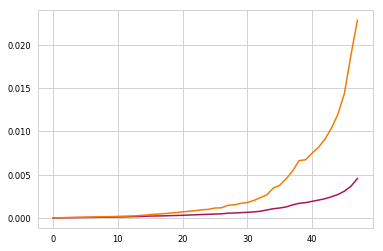

In [140]:
plt.plot(d_e)
plt.plot(d_max)

In [170]:
from joint_flight.results import results
from joint_flight.data.in_situ import faam
from joint_flight.data import hamp
from parts.scattering.psd.data.psd_data import PSDData, D_max
from parts.scattering.psd import D14MN

md = results["large_plate_aggregate"]["ice_md"]
n0 = results["large_plate_aggregate"]["ice_n0"]
z  = np.linspace(0, 13e3, 66)
f = RegularGridInterpolator((hamp.d[:-1], z), md)
md = f((cip.d, cip.z))
f = RegularGridInterpolator((hamp.d[:-1], z), n0)
n0 = f((cip.d, cip.z))

d14 = D14MN(-1, 3, rho = 917.0, mass_density = md, intercept_parameter = n0)
psd_data = d14.evaluate(np.array(d_e))

In [171]:
x = de_2_dmax(cip.x * 1e-2)


/home/simon/build/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  
/home/simon/build/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in maximum
  
/home/simon/build/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in log10
  


(0.001, 1.0)

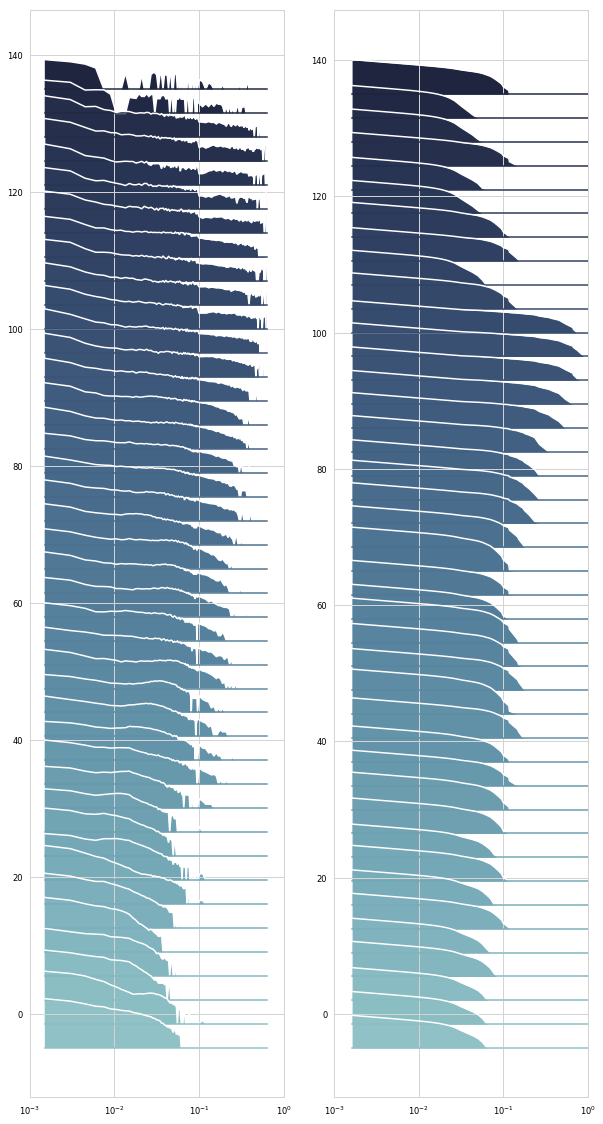

In [172]:
f, axs = plt.subplots(1, 2, figsize = (10, 20))

plot_psds(cip.x, cip.y_avg, ax = axs[0])
plot_psds(np.array(d_max) / 1e-2, psd_data.data.T * 1e-8, ax = axs[1])

axs[0].set_xlim([1e-3, 1e0])
axs[1].set_xlim([1e-3, 1e0])

#ax.set_yscale("log")    
#ax.grid("off")

/home/simon/src/matplotlib/lib/matplotlib/scale.py:111: RuntimeWarning: invalid value encountered in less_equal
  out[a <= 0] = -1000


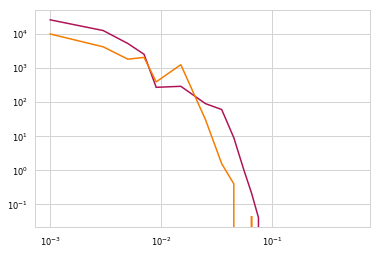

In [151]:
plt.plot(cip.x_r, cip.y_r[:, 1])
plt.plot(cip.x_r, cip.y_r[:, 2])
plt.yscale("log")
plt.xscale("log")